# Managing Complexity with BondGraphTools

https://github.com/peter-cudmore/seminars/CellML-2019

&nbsp;

    Dr. Peter Cudmore.  
    Systems Biology Labratory,   
    The School of Chemical and Biomedical Engineering,  
    The University of Melbourne.  

In [1]:
## Make sympy print pretty text
import sympy as sp
sp.init_printing()

# Load the examples
from examples import *

# Import the source-code inspector
from inspect import getsourcelines

# Start the julia interpreter
from BondGraphTools.config import config
_ = config.start_julia()

# Parameters from Safaei et.al. 2018
blood = Fluid(density=0.004, viscosity=1050)

# Approximate parameters for 10cm worth of artery.
artery = Vessel(radius=0.03, thickness=0.005, youngs_modulus=0.16e6, length=0.1)



## The problem with big systems is that they're _big_...

<center> <img src="images/map.png"> </center>

## Complex Physical Systems 

A _complex physical system_ has:
* many parts or subsystems (High-dimensional).
* subsystems which are not all of the same (Heterogenenous).
* subsystems which are complicated (Nonlinear and/or Noisy).
* well defined boundaries between the subsystems (Network Topology).
* **subsystems interact via resource exchange (Conservation Laws).**

Examples include: Biochemical Networks, Ecosystems, Electrical Grids, Hydraulic networks, etc.

## Some Obvious Questions

Human Metabolism Map @ https://www.vmh.life
<center> <img src="images/map.png" width=85%> </center>

1. Why?
2. Where do we get the topology from?
3. What are the dynamic features?
4. How do we paramaterise them?
5. What is a useful representation?
6. How do we manipulate and refine our model?
7. How should one manage complexity at scale?

## Why?

&nbsp;

To predict, understand and control systemic phenomenon such as emergence, multiscale dynamics and long-range interactions.

&nbsp;

To _rationally engineer_ systems in general and biological systems in particular. 

##  Where do we get network data?

For Systems Biology:
- Databases (Brenda, KEGG, BIGG, SABIO-RK, reactome)
- Model Repositories (Physiome Project, BioModels)
- Publications (supp. materials, images, tables)
- Collaborators.

More generally: connectivity maps.

## A Subtle Issue: Dynamics.

Recall that Complex Physical Systems have a _network topology_ of _conservative interactions_.

- As edges are 'resource exchange', 
- _effort_ must be imposed to move resources from one node to another,
- which move at some corresponding _flow_ rate.
- Nodes must either store resources, or conservatively pass them along. 
- The exceptions are the boundary conditions such as resource sources and sinks (including dissipation).

## A Major Issue: Parameterisation.

Ideally we would use parameters that:
- are physically meaningful,
- are able to be theoretically estimated,
- can be derived from underlying physics/chemistry,
- or that have been shown to be consistent across many experiemental conditions.
- and hence tabulated (or able to be derived from tablated data)

(but this is easier said than done)

## The Relevant Questions for Today. 

- What is a useful representation of a complex physical system?
- What is a good way to manipulate models?
- How do we manage complexity and scale? 

_Object Oriented Modelling via_ `BondGraphTools`.

## 'Energetic Systems' as an Object Oriented Programming.

Object Oriented Programming (OOP) is a software development paradigm that seeks to manage large, complicated projects by breaking problems into _data_ plus _methods_ that act on the data. 

Three big ideas in OOP are:
1. _Inheritance_ or is-a relationships. 
2. _Composition_ or has-a relationships.
3. _Encapsulation_ or infomation hiding.


This allows for _hierarchical_ and _modular_ design which reduces model complexity.

In [2]:
import BondGraphTools
help(BondGraphTools)

Help on package BondGraphTools:

NAME
    BondGraphTools

DESCRIPTION
    BondGraphTools
    BondGraphTools is a python library for symbolic modelling
    of energetic systems.
    
    Package Documentation::
    
        https://bondgraphtools.readthedocs.io/
    
    Source::
    
        https://github.com/BondGraphTools/BondGraphTools
    
    Bug reports:
    
        https://github.com/BondGraphTools/BondGraphTools/issues
    
    
    Simple Example
    --------------
    
    Build and simulate a RLC driven RLC circuit::
    
        import BondGraphTools as bgt
    
        # Create a new model
        model = bgt.new(name="RLC")
    
        # Create components
        # 1 Ohm Resistor
        resistor = bgt.new("R", name="R1", value=1.0)
    
        # 1 Henry Inductor
        inductor = bgt.new("L", name="L1", value=1.0)
        # 1 Farad Capacitor
        capacitor = bgt.new("C", name="C1", value=1.0)
        # Conservation Law
        law = bgt.new("0") # Common voltage 

### Bond Graphs, Port Hamiltonians and BondGraphTools



_Bond graphs_ are a **graphical** framework for modelling energetic systems.

_Port Hamiltonians_ are a **geometric** framework for modelling energetic systems.

_BondGraphTools_ is a **programmatic** framework for modelling energetic systems.

## Goals of this talk.

In the remaining time i hope to convince you that:
- Object oriented modelling is suited to complex physical systems.
- `BondGraphTools` is a useful library for this purpose.
- Incorporating scripting into your work is worthwhile.
-  `BondGraphTools` and `libCellML`

&nbsp;  

&nbsp;  



# Object Oriented Modelling for Energetic Systems 

&nbsp;

Inheritance, Composition and Encapsulation

## Inheritance



&nbsp;

For networked systems, _inheritance_ means that for each node or subsystems have:
- conditions on the interals.
- a description of the interface.

![Inheritance](images/inheritance.svg)

## Inheritance

&nbsp;

### Nodes are particular _energetic systems_ 
Each node is described by a set of differential-algebraic equations; the constitutive relations  

$$\Phi(\dot{x},x,e,f) = 0.$$

![Inheritance](images/inheritance.svg)

## Inheritance


&nbsp;

### Edges are constraints on port variables.

An edge represents how state is shared between systems.

![Inheritance](images/inheritance.svg)

## Inheritance

#### Example Node Subclasses:
- Resistive dissipation.
- Elastic defomation of vessel walls.
- Conservation of mass.

&nbsp;

_This_ chemical reation or _that particular_ aeortic compliance are **instances** of a particular subclass.

![Inheritance](images/inheritance.svg)

## Anatomy of an Energetic System

&nbsp;

Nodes can have _state_, represented by the variables $(\dot{x}, x)$

Examples with state:
- Charge accumulation.
- Chemical concentration.
- Elastic deformation.

![NodeAnatomy](images/anatomy.svg)

## Anatomy of an Energetic System

&nbsp;

Nodes can alternatively be stateless.

Examples without state:
- resistance / friction
- semiconductance
- elementary chemical reactions

![NodeAnatomy](images/anatomy.svg)

## Anatomy of an Energetic System

&nbsp;

Nodes can have _external ports_ (here labeled $[1]$ , $[2]$ and $[3]$) which provide an interface to the external environment.

Examples of ports:
- The poles of a dielectic membrane
- The open end of a vessel segment.
- The enzyme/substrate/cofactor mix of a biochemical reaction. 

![NodeAnatomy](images/anatomy.svg)

## Anatomy of an Energetic System


$\Phi$ relates _internal state_ to _external environment_.

The relation $\Phi$ may have parameters such as: 
- Temperature and pressure
- Gibbs formation energy
- Vessel wall compliance
- Electrical resistance


![NodeAnatomy](images/anatomy.svg)

## Composition


&nbsp;
_Composition_ means that we can replace subgraphs with a single node and vice-versa.

&nbsp;

_This means we both abstract parts of the model, or refine parts of the model as necessary!_

![Composition](images/composition.svg)

## Composition

&nbsp;
Recall that each node is a set of DAE's  
$$\Phi_j(\dot{x},x,e,f) = 0.$$

One can simply take the direct sum of the systems to produce a composite system  

$$
\Phi_0 = \left(
\Phi_6,
\Phi_7,\Phi_8,
\Phi_{edges}\right)^T = 0
$$

![Composition](images/composition.svg)

## Compostion

For 
$$
\Phi_0 = \left(
\Phi_6,
\Phi_7, \Phi_8
\Phi_{edges}\right)^T = 0
$$  
the relation   
$$\Phi_{edges} = (e^i_\alpha - e^j_\beta, f^i_\alpha + f^j_\beta,\ldots)$$  
turns edges between node-ports pairs $(i,\alpha)$ and $(j,\beta)$ into constraints upon the composed system $\Phi_0$.

![Composition](images/composition.svg)

## Compositon

&nbsp;

_Like joining pipe segments!_
- $e^i_\alpha - e^j_\beta = 0$ implies 'pressure'(effort) is identical at the join.
- $f^i_\alpha + f^j_\beta = 0$ implies the flow goes losslessly from one, to the other.

![Composition](images/composition.svg)

## Encapsulation

&nbsp;

Encapsulation = Modularity!

- Model Sharing.
- Scalablity!

![Encapsulation](images/encapsulation.svg)

## Encapsulation

&nbsp;

Encapsulation allows Model Comparison.

- In-place model swaps.
- Model re-use.

![Encapsulation](images/encapsulation.svg)

## Object Oriented Modelling and Energetic Systems

Energetic systems provide:
- _Inheritance_; an abstract base representation of energetic systems.
- _Composition_; a way to hierarchically compose systems of systems.
- _Encapsulation_; a framework inside which simplifications can occur.

&nbsp;  



# `BondGraphTools`

&nbsp;

Modelling Object Oriented Physical System

## Energetic Modelling as Object Oriented Programming.

`BondGraphTools` provides the infrastructure to
- Represent complex physical systems as object oriented python code.
- Manipulate and organise models of complex phyiscal systems programmitcally.
- Algorithmically simplify the resulting models.

## What `BondGraphTools` is good for

(and why you should use it, or pinch ideas from it)

- automated model reduciton
- scripted model building
- formal (code) modelling of systems.
- tool integration

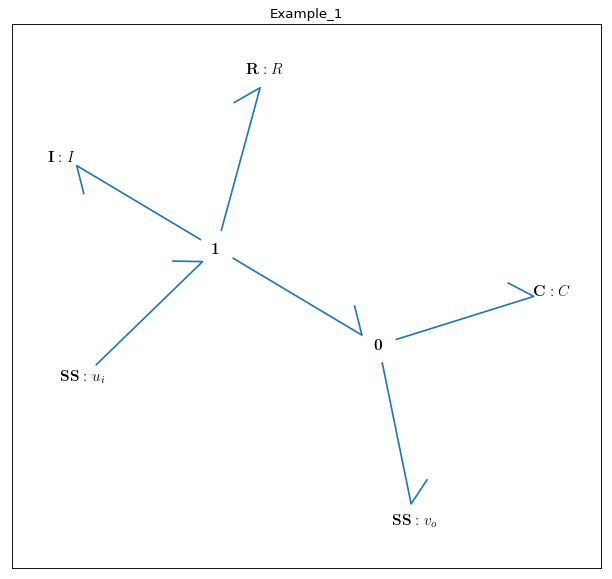

In [4]:
from BondGraphTools import draw
segment1 = VesselSegmentA(
    "Example_1", artery, blood
)
draw(segment1)

In [5]:
source, _  = getsourcelines(VesselSegmentA)
for line in source:
    print(line[:-1])

class VesselSegmentA(bgt.BondGraph):
    """A vascular vessel segment.

    This class is an example of Vessel Segment A from:
    Safaei, Sorous. Blanco, Pablo J. Müller, Lucas O. Hellevik, Leif R. and Hunter, Peter J.
    Bond Graph Model of Cerebral Circulation: Toward Clinically Feasible Systemic Blood Flow Simulations
    Frontiers in Physiology, 2018, volume 9, page 148

    The vessel segment is of the $uv$ type that has components:
        - pressure inlet $u_i$
        - flow outlet $v_o$
        - fluid interia $I$
        - wall dissipation $R$
        - and compliance $C$.

    The linear resistance, compliance and inertance are computed as per Safaei et.al..

    See Also: BondGraph
    """

    def __init__(self, name, vessel, fluid):
        """
        Args:
            name (str):      The name of this vessel segement
            vessel (Vessel): The vessel material properties
            fluid (Fluid):   The fluid properties
        """
        # Parameters
        re

## Scripting the construction of an artery model

In [6]:
from BondGraphTools import new, add, connect
length = 1
current_length = 0
segment_counter = 0

artery_model = new()
inlet = new('Se', name='inlet', label='u_i')
add(artery_model, inlet)

outlet = bgt.new('Sf', name='outlet', label='v_o')
add(artery_model, outlet)
last_outlet = inlet

  

In [7]:
while current_length < length:
    # Add a new segment 
    this_segment = VesselSegmentA(
        name=f"Segment_{{{segment_counter}}}", 
        vessel=artery, fluid=blood)
    add(artery_model, this_segment)
    current_inlet_port = (this_segment, 'u_i')
    
    # and connect it to the previous one
    connect(last_outlet, current_inlet_port)

    # Update the counter variables
    last_outlet = (this_segment, 'v_o')
    current_length = current_length + artery.length
    segment_counter = segment_counter + 1

connect(last_outlet, outlet) 

## Automatically Generating Equations

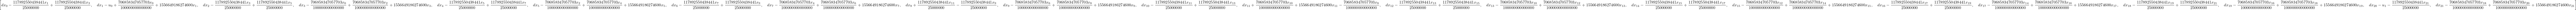

In [8]:
artery_model.constitutive_relations

## Algorithmic Substitution

In [9]:
from BondGraphTools import (
    BondGraph, expose, new, connect)

class Voigt_Model(BondGraph):
    def __init__(self, name, 
                 compliance, dissipation):
        # ------ Define the Subcomponents
        C = new("C", name='C', value=compliance)
        R = new("R", name='R',value=dissipation)
        law = new('1')
        port = new("SS", name='SS')
        # ------ Build the model
        super().__init__(name=name, 
            components=(C, R, law, port)
        )        
        # ------ Wire it up
        connect(port, law)
        connect(law, R)
        connect(law, C)
        # ----- Expose the port
        expose(port, label="C_v")

In [10]:
from BondGraphTools import swap
# simple iterator function
def next_segment(model):
    i = 0
    try:
        while True:
            yield model / f"Segment_{{{i}}}"
            i += 1
    except ValueError:
        return StopIteration

# swap the components out for each segment
for segment in next_segment(artery_model):
    C = segment / "C"
    C_v = Voigt_Model('C_v', 
                      C.params['C'], 
                      0.001)

    swap(C, C_v)

In [11]:
print_tree(artery_model)

BG: BG1
|-BG: Segment_{10}
|--BG: C_v
|---SS: SS
|---1: 124
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: Segment_{9}
|--BG: C_v
|---SS: SS
|---1: 123
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: Segment_{8}
|--BG: C_v
|---SS: SS
|---1: 122
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: Segment_{7}
|--BG: C_v
|---SS: SS
|---1: 121
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: Segment_{6}
|--BG: C_v
|---SS: SS
|---1: 120
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: Segment_{5}
|--BG: C_v
|---SS: SS
|---1: 119
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: Segment_{4}
|--BG: C_v
|---SS: SS
|---1: 118
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: Segment_{3}
|--BG: C_v
|---SS: SS
|---1: 117
|---R: R
|---C: C
|--SS: v_o
|--SS: u_i
|--0: 0
|--1: 1
|--I: I
|--R: R
|-BG: S

## Automated Model Building

In [12]:
TCA_reactions = {
    "Citrate synthase": 
        ["acetyl-CoA + oxaloacetate + H2O = citrate + CoA-SH"],
    "Aconitase": 
        ["Citrate = cis-Aconitate + H2O", "cis-Aconitate + H2O = Isocitrate"],
    "Isocitrate dehydrogenase": 
        ["Isocitrate + NAD = Oxalosuccinate + NADH + H", 
         "Oxalosuccinate = a-Ketoglutarate + CO2" ],
    "a-Ketoglutarate dehydrogenase": 
        ["a-Ketoglutarate + NAD + CoA-SH = Succinyl-CoA + NADH + H + CO2"],
     "Succinyl-CoA synthetase":  
        ["Succinyl-CoA + ADP + Pi = Succinate + CoA-SH + ATP"],
     "Succinate dehydrogenase": 
        ["Succinate + Q = Fumarate + QH2"],
     "Fumarase":
        ["Fumarate + H2O = L-Malate"],
     "Malate dehydrogenase":
        ["L-Malate + NAD = Oxaloacetate + NADH + H"]
} 

In [13]:
from BondGraphTools.reaction_builder import (
    Reaction_Network)

def TCA_Cycle():
    reaction_net = Reaction_Network(
        name="TCA_Cycle"
    )
    # loop through each enzyme
    for enzyme in TCA_reactions:
        for i, reaction in enumerate(TCA_reactions[enzyme]):
            # add each reaction.
            reaction_net.add_reaction(
                reaction,
                name=f"{enzyme} - {i}"
            )
    return reaction_net 

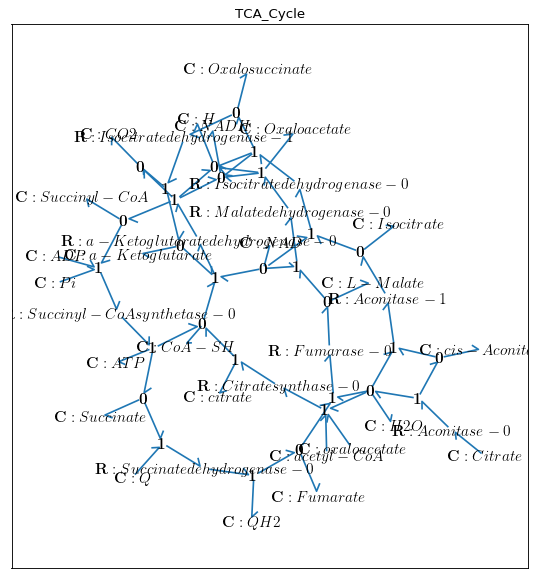

In [14]:
from BondGraphTools import draw
tca_model = TCA_Cycle().as_network_model()
draw(tca_model)

## ...from data to equations

In [15]:
tca_model.constitutive_relations

In [16]:
# Parameters
tca_model.params

{0: (C: acetyl-CoA, 'k'),
 1: (C: acetyl-CoA, 'R'),
 2: (C: acetyl-CoA, 'T'),
 3: (C: oxaloacetate, 'k'),
 4: (C: oxaloacetate, 'R'),
 5: (C: oxaloacetate, 'T'),
 6: (C: H2O, 'k'),
 7: (C: H2O, 'R'),
 8: (C: H2O, 'T'),
 9: (C: citrate, 'k'),
 10: (C: citrate, 'R'),
 11: (C: citrate, 'T'),
 12: (C: CoA-SH, 'k'),
 13: (C: CoA-SH, 'R'),
 14: (C: CoA-SH, 'T'),
 15: (C: Citrate, 'k'),
 16: (C: Citrate, 'R'),
 17: (C: Citrate, 'T'),
 18: (C: cis-Aconitate, 'k'),
 19: (C: cis-Aconitate, 'R'),
 20: (C: cis-Aconitate, 'T'),
 21: (C: Isocitrate, 'k'),
 22: (C: Isocitrate, 'R'),
 23: (C: Isocitrate, 'T'),
 24: (C: NAD, 'k'),
 25: (C: NAD, 'R'),
 26: (C: NAD, 'T'),
 27: (C: Oxalosuccinate, 'k'),
 28: (C: Oxalosuccinate, 'R'),
 29: (C: Oxalosuccinate, 'T'),
 30: (C: NADH, 'k'),
 31: (C: NADH, 'R'),
 32: (C: NADH, 'T'),
 33: (C: H, 'k'),
 34: (C: H, 'R'),
 35: (C: H, 'T'),
 36: (C: a-Ketoglutarate, 'k'),
 37: (C: a-Ketoglutarate, 'R'),
 38: (C: a-Ketoglutarate, 'T'),
 39: (C: CO2, 'k'),
 40: (C: CO2

In [17]:
from BondGraphTools import set_param, swap, new

# Set Parameters to 1
value = 1

for param in tca_model.params:
    set_param(tca_model, param, value)

# Swap acetyl_CoA for a effort source
acetyl_CoA = tca_model / "C: acetyl-CoA"
flow_control = new("Se", value=None)
swap(acetyl_CoA, flow_control)

In [18]:
tca_model.constitutive_relations

## Basic Simulation

In [ ]:
import numpy as np
x_dim = len(tca_model.state_vars)
x0 = np.exp(np.random.randn(x_dim))

from BondGraphTools import simulate
t, x = simulate(tca_model, 
                timespan=[0,1], 
                x0=x0, 
                control_vars=["t > 0.2 ? 2 : 0"])

In [ ]:
from matplotlib.pyplot import plot
_ = plot(t, x)

## BondGraphTools Development Philosophy

BondGraphTools ideals:
- working is better than right.
- ... it should just do the thing.
- ... it does what it says on the box.
- don't make the user fight the tools.

## What `BondGraphTools` does not do

- dimensional anaysis
- ensure realistic models
- graphical user interfaces
- parameter fitting
- ontologies, metadata...

## `BondGraphTools` in literature

Used in forthcoming work by:
- Prof. Peter Gawthrop (Physically Plausible Models)
- Michael Pan (Algorithmic Model Evalutition)
- PC (`BondGraphTools`)

## Current Status:

Currently version: 0.3.8

The next version 0.4 will include:
- Symbolics overhaul.
- Improved model reduction.
- Cleaner parameter handline.
- Observables.

# Thanks
- Andre and the CellML workshop organisers
- Prof. Peter Hunter and the ABI
- Prof. Edmund Crampin, Prof. Peter Gawthrop and Michael Pan & The Systems Biology Lab

<table >
    <tr style="background-color:#FFFFFF;">
        <td><img src="images/PRIMARY_A_Vertical_Housed_RGB.png" alt="University of Melbourne" width=50% align="center"></td>
        <td><img src="images/cbns-logo.png" alt="ARC Center of Excellence in Convergent Bio-Nano Science and Technology" width=100% align="center"></td>
    </tr>
</table>

## Please check out `BondGraphTools`

Docs: https://bondgraphtools.readthedocs.io/

GitHub: https://github.com/BondGraphTools